# Heart Disease Dataset
A simple records of Heart Patients monitored - Binary Classification Problem.

# About Dataset

##### This Data contains 14 attributes out of which 13 are independent while 1 is depend which is target feature.

Age : age in years. 

Sex : sex (1=male; 0=female).    

Cp : chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3: asymptomatic).

Trestbps : resting blood pressure in mm Hg on admission to the hospital.    

Chol : serum cholesterol in mg/dl.   

fbs : fasting blood sugar > 120 mg/dl (1=true; 0=false). 

Restecg : resting electrocardiographic results ( 0=normal; 1=having ST-T wave abnormality; 2=probable or definite left ventricular hypertrophy).   

Thalach : maximum heart rate achieved.    

Exang : exercise-induced angina (1=yes; 0=no).    

Oldpeak : ST depression induced by exercise relative to rest.    

Slope : the slope of the peak exercise ST segment (0=upsloping; 1=flat; 2=downsloping).    

Ca : number of major vessels (0–4) colored by fluorosopy.    

Thal : thalassemia (1=normal; 2=fixed defect; 3=reversable defect).    

Target : heart disease (0=no, 1=yes). 

   -- Value 0: < 50% chances of heart attack

   -- Value 1: > 50% chances of heart attack

##### This is a typical binary classification task.

# Acknowledgements :

##### This dataset has been referred from Kaggle.
https://www.kaggle.com/datasets/puspitasaha/heart-disease-prediction

# Objective :
1. Understand the Dataset & cleanup (if required).
2. Build classification models to predict whether or not the patients have Heart Disease.


# Load Essential Python Libraries

In [1]:
import pandas as pd                     # Data manipulation and processing
import numpy as np                      # Linear algebra
import matplotlib.pyplot as plt         # Data visualization
%matplotlib inline
import seaborn as sns                   # Data visualization
import warnings                         # Hiding Warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
heart = pd.read_csv("E://priya//EXL-DATA ANALYYICS//Datasets//Heart2.csv")

# Exploratory Data Analysis (EDA) 

In [3]:
#Top 5 records from data
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#Last 5 records from data
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
#Random 5 sample records from data
heart.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
161,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
278,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
810,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
529,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
803,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0


In [6]:
heart.shape

(1025, 14)

##### This data contains 14 columns and 1025 rows

In [7]:
heart.size

14350

In [8]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
#Info of data (i.e.datatype & non-null value count of all columns)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


##### This data contains 14 columns and all are numeric columns in that one of the column named oldpeak is float while other 13 are integer.

In [10]:
#Descriptive ststistic
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1.This is data of people whose age range is in between 29 and 77.

2.Resting blood pressure range is in between 94 to 200.

3.Cholesterol lies in between 126 and 564.

4.Maximum heart rate achieved range is in between 71 to 202.

5.Range of Oldpeak i.e. ST depression induced by exercise relative to rest is in between 0 to 6.2.

In [11]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

# Handling Missing values

In [12]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### As sum of null values  of each column is zero , data is free from missing  values.

# Checking duplicate values

In [13]:
heart.duplicated().sum()

723

#### There are 723 duplicate values present in this data so, we have to drop those duplicate values.

In [14]:
heart.drop_duplicates(inplace=True)

In [15]:
heart.duplicated().sum()

0

In [16]:
#shape after dropping duplicate values
heart.shape

(302, 14)

##### Before dropping this data contains 1025 rows and after dropping shape is reduced i.e now this data contains 302 rows and 14 columns.

# Handling Outliers

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
exang          AxesSubplot(0.125,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
ca          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
thal              AxesSubplot(0.125,0.125;0.168478x0.16413)
target         AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

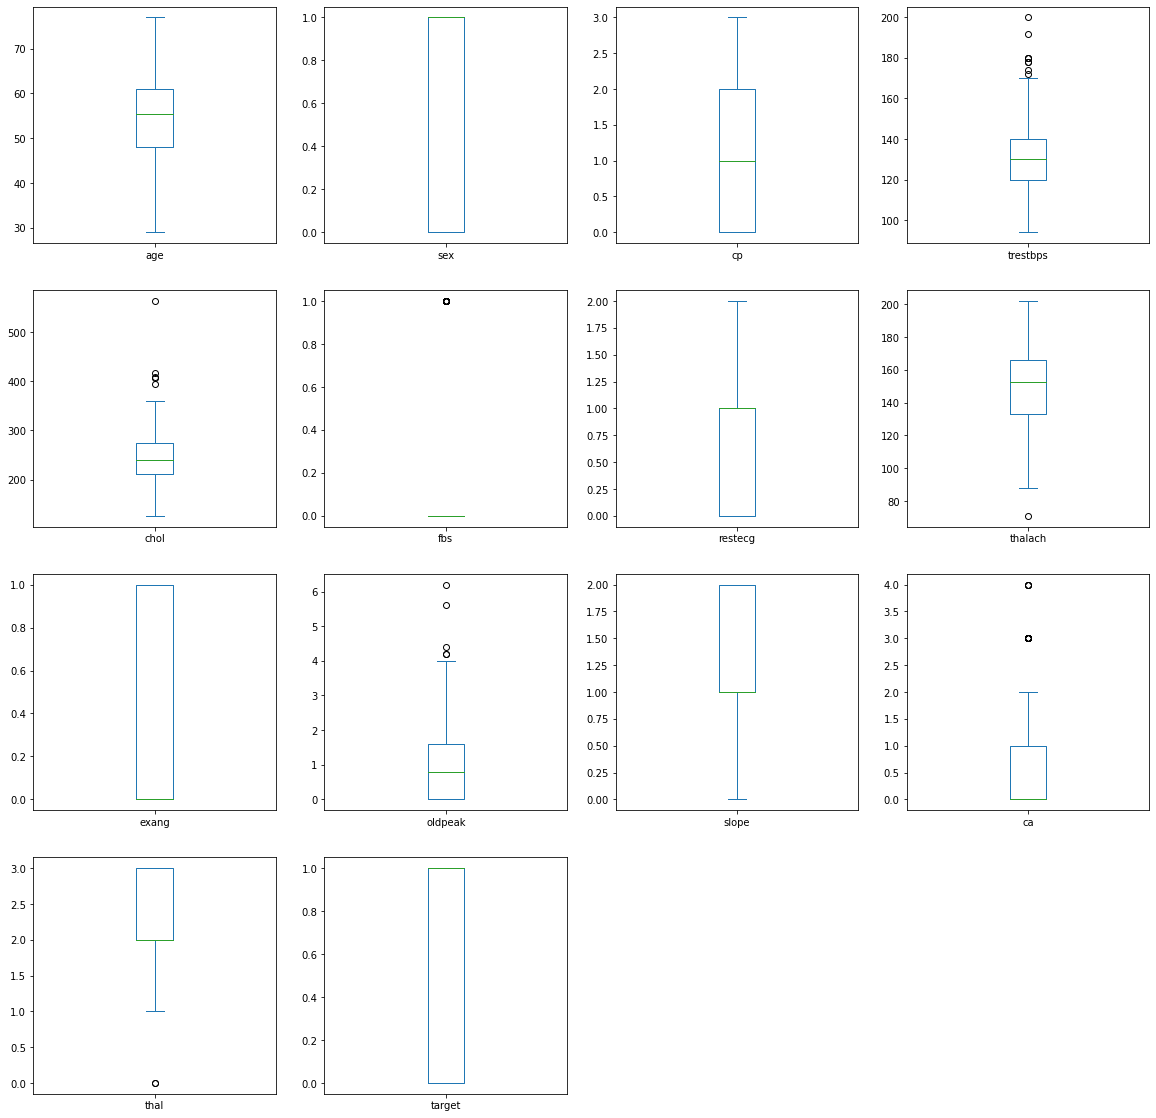

In [17]:
#Box plot to see the distribution of all attributes
heart.plot(kind = "box",subplots = True , layout = (4,4),sharex = False , sharey = False , figsize = (20,20))

##### From this boxplot, we can see that there are some outliers present in some of columns like trestbps , chol , oldpeak , ca,thal and thalach.So,first we have to remove those outliers.

In [18]:
heart = heart[heart.trestbps < 170]
heart = heart[heart.chol < 360]
heart = heart[heart.oldpeak < 4]
heart = heart[heart.ca < 2.5]
heart = heart[heart.thal > 1]
heart = heart[heart.thalach > 90]

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
exang          AxesSubplot(0.125,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
ca          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
thal              AxesSubplot(0.125,0.125;0.168478x0.16413)
target         AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

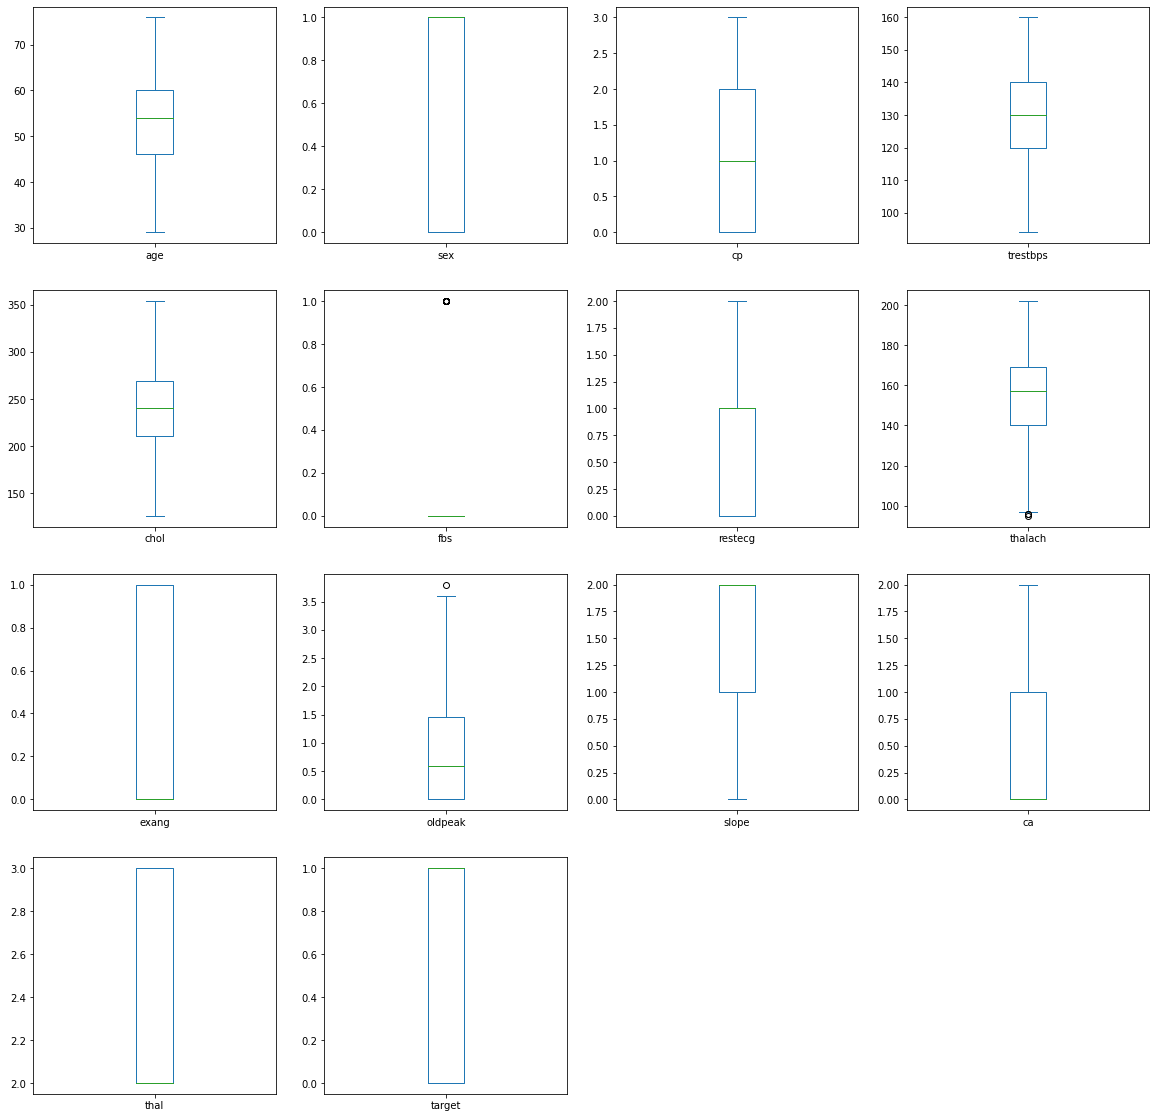

In [19]:
heart.plot(kind = "box",subplots = True , layout = (4,4),sharex = False , sharey = False , figsize = (20,20))

##### Here we can see that some of the outliers are removed.

In [20]:
#shape after removing outliers
heart.shape

(239, 14)

###### Shape before outlier removal was 302 rows & 14 columns and shape after outlier removal is 239 rows & 14 columns.

# Checking Multicollinearity

In [21]:
#Checking the Multicollinearity:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.088966,-0.044374,0.251666,0.141381,0.120646,-0.044233,-0.427007,0.109050,0.184469,-0.157731,0.386048,0.114367,-0.206258
sex,-0.088966,1.000000,-0.095911,-0.013946,-0.118765,0.065406,-0.083106,-0.022885,0.175870,0.164924,-0.022390,0.093924,0.399656,-0.327976
cp,-0.044374,-0.095911,1.000000,0.125876,-0.061619,0.136287,0.090869,0.239191,-0.357992,-0.081211,0.093544,-0.183069,-0.307508,0.404736
trestbps,0.251666,-0.013946,0.125876,1.000000,0.069791,0.119762,-0.065215,0.033212,-0.033489,0.119047,-0.004363,0.044355,0.037199,-0.057216
chol,0.141381,-0.118765,-0.061619,0.069791,1.000000,0.001759,-0.125044,-0.007451,0.049147,-0.010269,0.043883,0.133371,0.006079,-0.086771
fbs,0.120646,0.065406,0.136287,0.119762,0.001759,1.000000,-0.062401,0.022759,-0.012339,-0.006783,-0.046139,0.076752,0.015426,0.033090
restecg,-0.044233,-0.083106,0.090869,-0.065215,-0.125044,-0.062401,1.000000,0.069531,-0.102335,-0.071508,0.124461,-0.047993,0.031081,0.133235
thalach,-0.427007,-0.022885,0.239191,0.033212,-0.007451,0.022759,0.069531,1.000000,-0.412714,-0.337013,0.373534,-0.229941,-0.299863,0.388276
exang,0.109050,0.175870,-0.357992,-0.033489,0.049147,-0.012339,-0.102335,-0.412714,1.000000,0.325166,-0.255226,0.186199,0.361967,-0.410732
oldpeak,0.184469,0.164924,-0.081211,0.119047,-0.010269,-0.006783,-0.071508,-0.337013,0.325166,1.000000,-0.545557,0.273056,0.308781,-0.434643


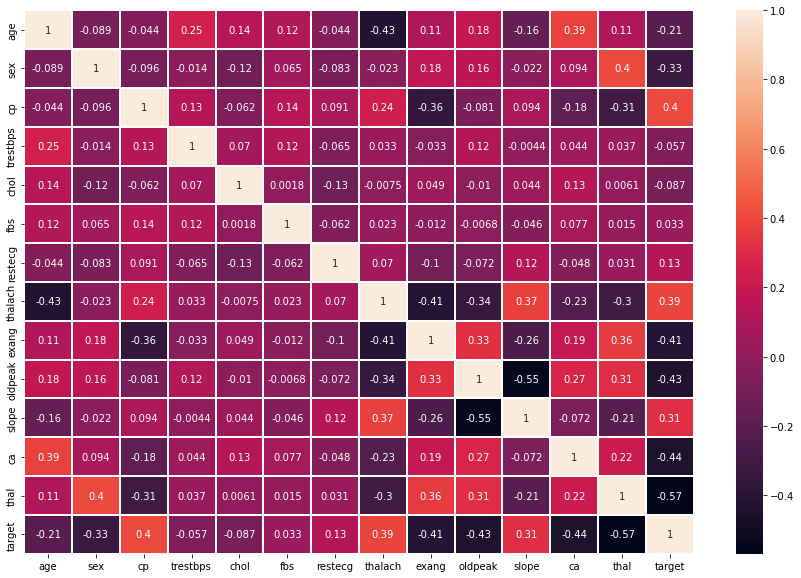

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(),annot = True, linewidth = 2)
plt.show()

#### Values in a correlation matrix stand between -1 and +1, where slightly positive correlation features can be something like 0.5, and strong correlation is > 0.8. Here, we don't have those kind of correlation, so we don't need to perform a PCA. 

# Data Visualization

In [23]:
heart["target"].value_counts()

1    143
0     96
Name: target, dtype: int64

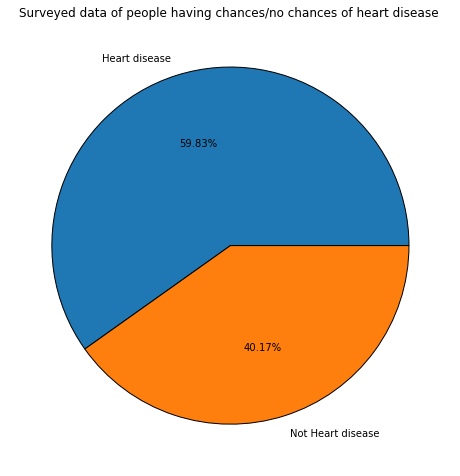

In [24]:
plt.figure(figsize = (8,10))
plt.pie(heart["target"].value_counts(),labels=["Heart disease","Not Heart disease"],wedgeprops = {"edgecolor":"black"},autopct='%.2f%%')
plt.title("Surveyed data of people having chances/no chances of heart disease " )
plt.show()

##### Near about 60% people in this data have chances of heart disease and 40% have not heart disease.

In [25]:
heart["sex"].value_counts()

1    159
0     80
Name: sex, dtype: int64

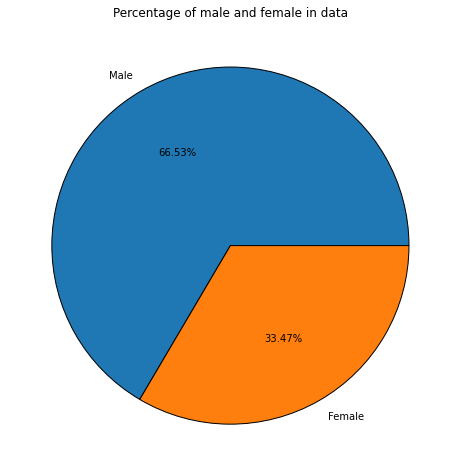

In [26]:
plt.figure(figsize = (8,10))
plt.pie(heart["sex"].value_counts(),labels=["Male","Female"],wedgeprops = {"edgecolor":"black"},autopct='%.2f%%')
plt.title("Percentage of male and female in data" )
plt.show()

##### This data contains nearly 67% of males data and 33% female's data.

<AxesSubplot:xlabel='thal', ylabel='count'>

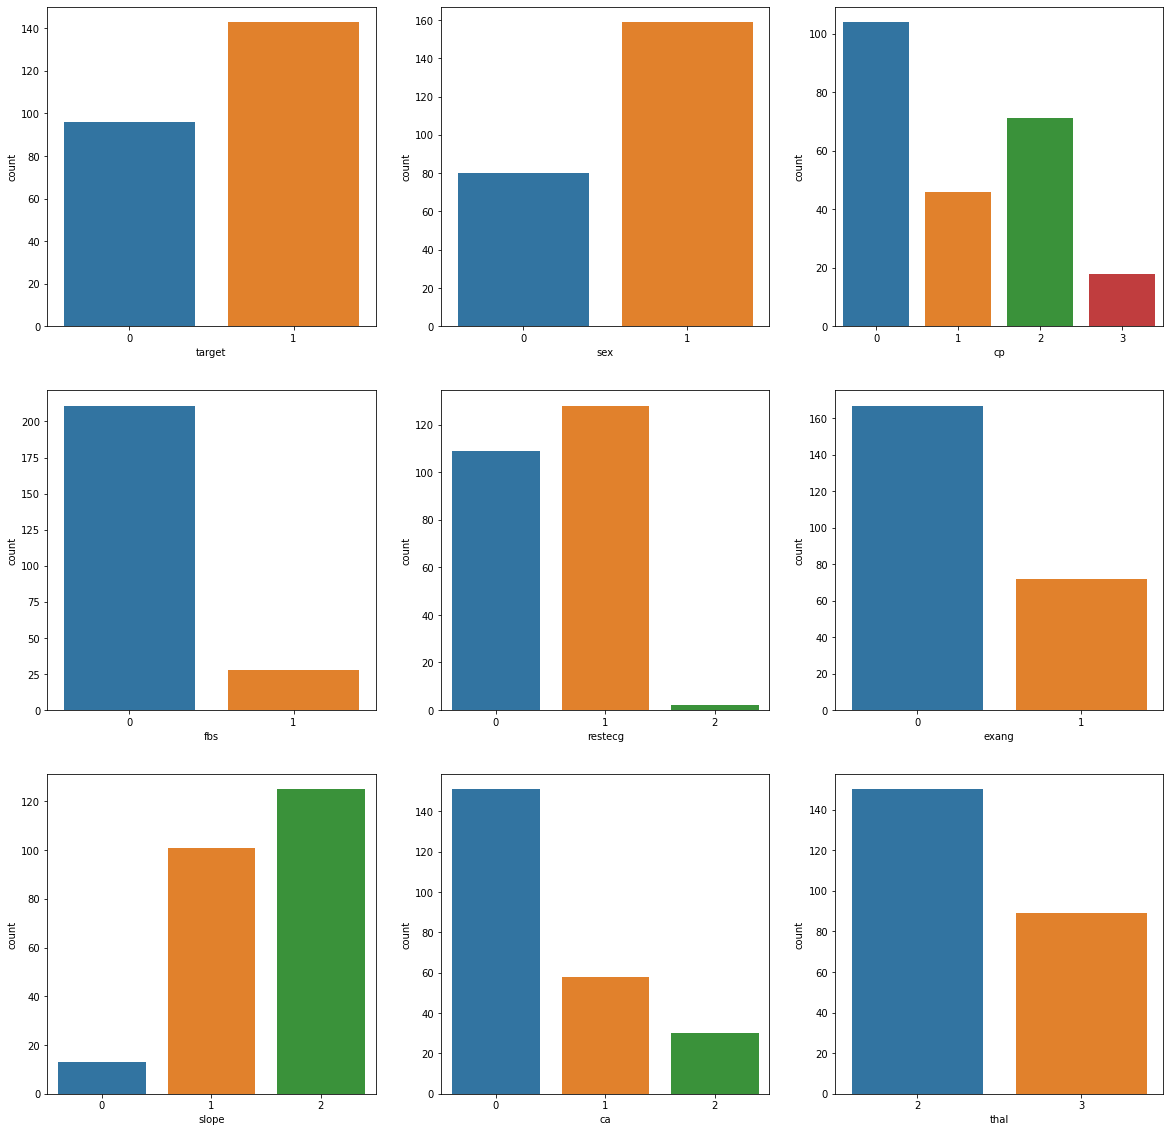

In [27]:
fig,ax = plt.subplots(3,3,figsize=(20,20))
sns.countplot("target",data=heart,ax=ax[0][0])
sns.countplot("sex",data=heart,ax=ax[0][1])
sns.countplot("cp",data=heart,ax=ax[0][2])
sns.countplot("fbs",data=heart,ax=ax[1][0])
sns.countplot("restecg",data=heart,ax=ax[1][1])
sns.countplot("exang",data=heart,ax=ax[1][2])
sns.countplot("slope",data=heart,ax=ax[2][0])
sns.countplot("ca",data=heart,ax=ax[2][1])
sns.countplot("thal",data=heart,ax=ax[2][2])

1.Maximum peoples are with heart disease.

2.Count of males is high than female count.

3.Maximum peoples in this data have chest pain type 0 = typical angina and mininum are with chest pain type 3: asymptomatic.
 
4.Maximum people in this data have fasting blood sugar < 120 mg/dl

5.In this data ,people with resting electrocardiographic result 1=having ST-T wave abnormality are maximum(>120),people with 2=probable or definite left ventricular hypertrophy are minimum(near about 5) and people with 0=normal are near about 110.

6.There are maximum people with exercise -induced angina than people without.

7.Many peoples in this data have slope of the peak exercise ST segment 2=downsloping. (0=upsloping; 1=flat)

8.More than 140 people are with 0 number of major vessels colored by fluorosopy.

9.More than 140 people i.e near about 150 people having fixed defect(2) thalassamia and near about 90 have reversable defect(3)thalassemia.

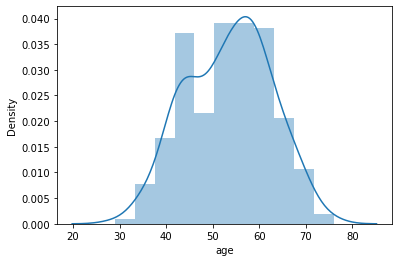

In [28]:
sns.distplot(heart["age"])
plt.show()

##### We see there are no outliers present in age variable.And most of the people are of age in between 50-65.

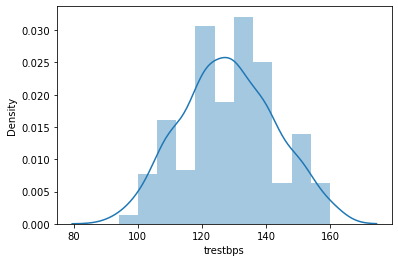

In [29]:
sns.distplot(heart["trestbps"])
plt.show()

##### We see that distribution of this feature is fairly normal.

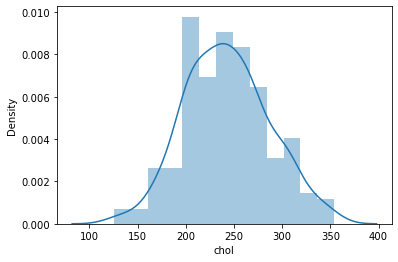

In [30]:
sns.distplot(heart["chol"])
plt.show()

##### We see that the distribution is some how similar to resting bps i.e fairly normal.

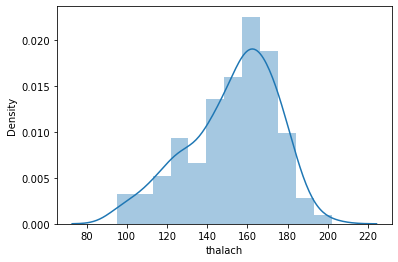

In [31]:
sns.distplot(heart["thalach"])
plt.show()

##### It can be inferred that most of the data in the distribution of thalach(maximum heart rate) is towards right which means it is not normally distributed it is left skewed.

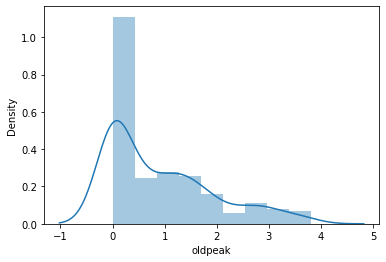

In [32]:
sns.distplot(heart["oldpeak"])
plt.show()

##### We see that most of the data in the distribution of oldpeak(ST depression induced by exercise relative to rest) is towards left means data is right skewed.

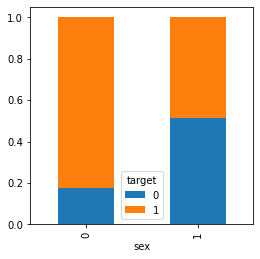

In [33]:
sex=pd.crosstab(heart["sex"],heart["target"])
sex.div(sex.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

##### The proportion of female with heart disease is high while the proportion is higher of male without heart disease.

<AxesSubplot:xlabel='sex', ylabel='count'>

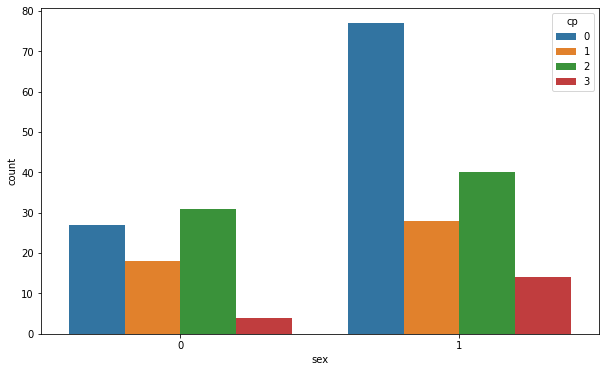

In [34]:
plt.figure(figsize=(10,6))  
sns.countplot(x="sex", hue="cp", data=heart)

##### It can be inferred that proportion for both male and female is low having chest pain type 3(asyptomatic).Most of the males have chest pain type 0 (typical angina).The proportion of females with chest pain type 0(typical angina)& type 2(non-anginal pain) are nearly same.

<AxesSubplot:xlabel='sex', ylabel='count'>

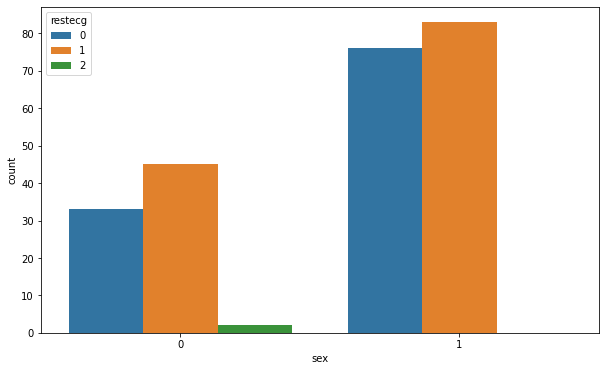

In [35]:
plt.figure(figsize=(10,6))  
sns.countplot(x="sex", hue="restecg", data=heart)

##### We see that there is no resting ECG of type 2=probable or definite left ventricular hypertrophy is seen in males and it is less seen in females.It means that both in males and females most inferred resting ECG is of type 0(normal)& 1(having ST-T wave abnormality)

<AxesSubplot:xlabel='sex', ylabel='count'>

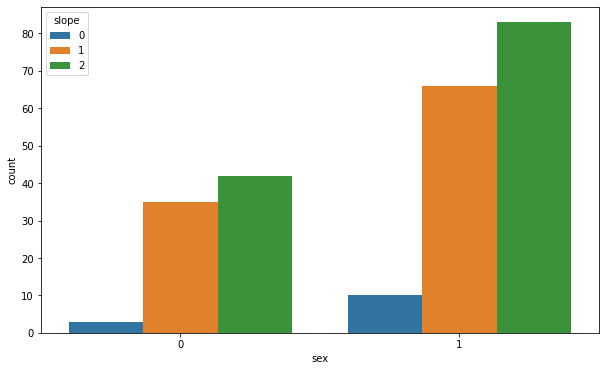

In [36]:
plt.figure(figsize=(10,6))  
sns.countplot(x="sex", hue="slope", data=heart)

##### It can be inferred that very few males and females have upsloping peak exercise ST segment.And downsloping peak found is high in both male and female.(1=flat)


<AxesSubplot:xlabel='sex', ylabel='count'>

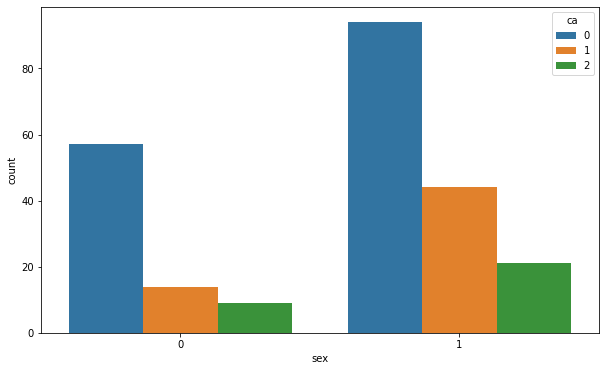

In [37]:
plt.figure(figsize=(10,6))  
sns.countplot(x="sex", hue="ca", data=heart)

##### The proportion is high for both males and females for without fluoroscopy colored major vessels.

<AxesSubplot:xlabel='cp', ylabel='count'>

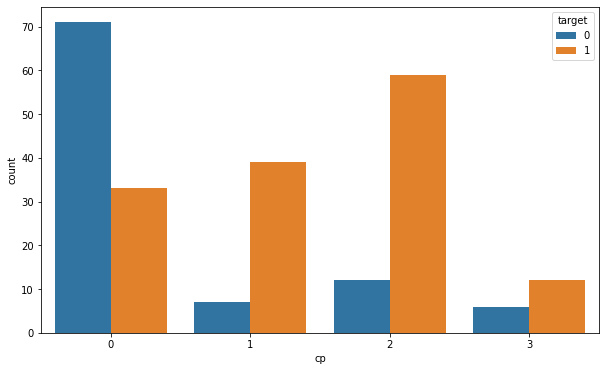

In [38]:
plt.figure(figsize=(10,6))  
sns.countplot(x="cp", hue="target", data=heart)

##### It seems that chances are high for people having heart disease when they have chest pain type are 1,2 & 3 while for chest pain type 0 have chances of heart disease is half that of not having heart disease.

<AxesSubplot:xlabel='fbs', ylabel='count'>

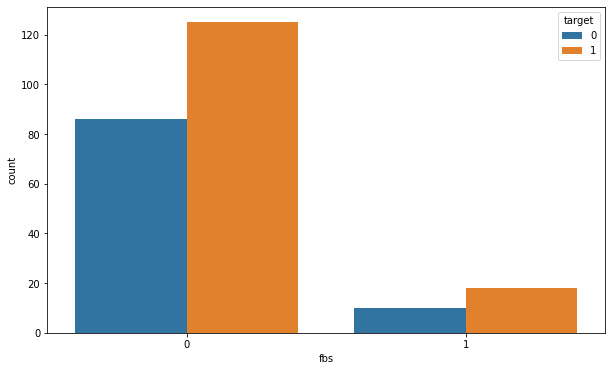

In [39]:
plt.figure(figsize=(10,6))  
sns.countplot(x="fbs", hue="target", data=heart)

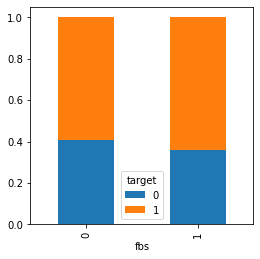

In [40]:
fbs=pd.crosstab(heart["fbs"],heart["target"])
fbs.div(fbs.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

##### We see that proportion of person with and without fasting blood sugar is more or less same for having and not having heart disease.

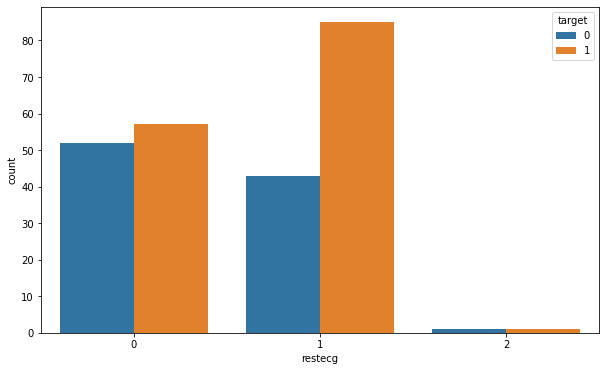

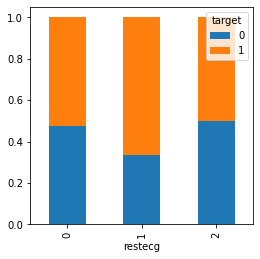

In [41]:
plt.figure(figsize=(10,6))  
sns.countplot(x="restecg", hue="target", data=heart)

restecg=pd.crosstab(heart["restecg"],heart["target"])
restecg.div(restecg.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

##### The proportion of having heart disease is higher in people having ST-T wave abnormality in ECG .

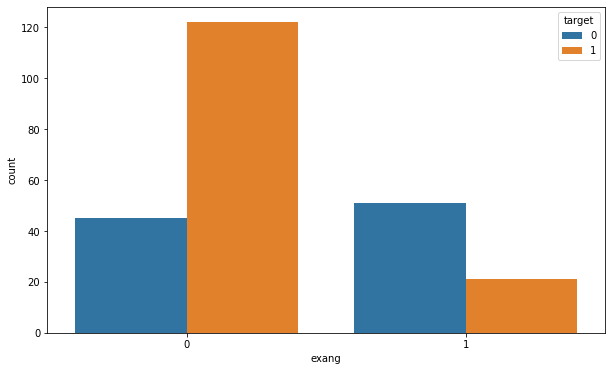

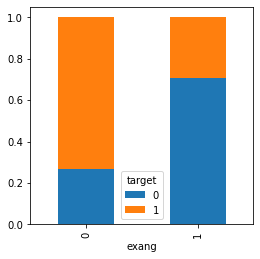

In [42]:
plt.figure(figsize=(10,6))  
sns.countplot(x="exang", hue="target", data=heart)

exang=pd.crosstab(heart["exang"],heart["target"])
exang.div(exang.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

##### The chances of having heart disease is less in people having exercise angina and high in people not having exercise angina.

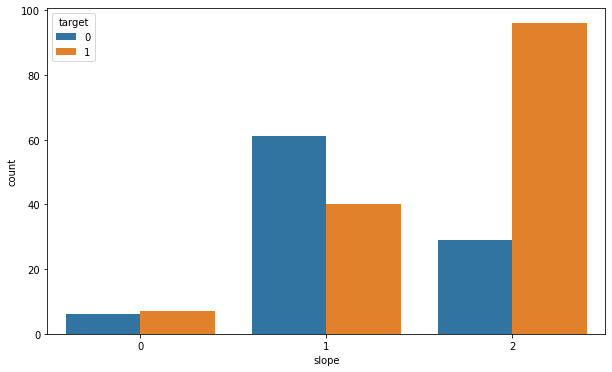

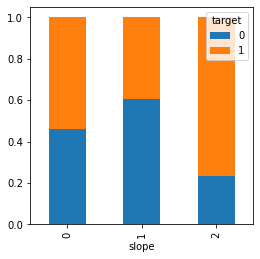

In [43]:
plt.figure(figsize=(10,6))  
sns.countplot(x="slope", hue="target", data=heart)

slope=pd.crosstab(heart["slope"],heart["target"])
slope.div(slope.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

##### The chances of having heart disease is higher in people with upsloping peak exercise ST segment.There are less chances of having heart disease when slope is flat.

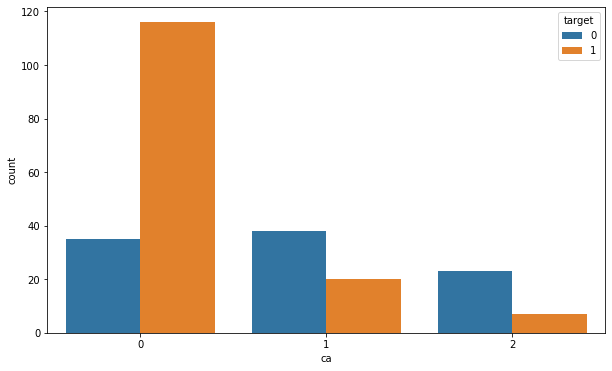

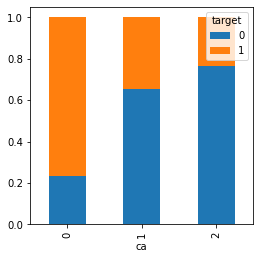

In [44]:
plt.figure(figsize=(10,6))  
sns.countplot(x="ca", hue="target", data=heart)

ca=pd.crosstab(heart["ca"],heart["target"])
ca.div(ca.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

##### There are less chances of having heart disease in people with 2 fluorosopy colored major vessels and high not having fluorosopy colored vessel.

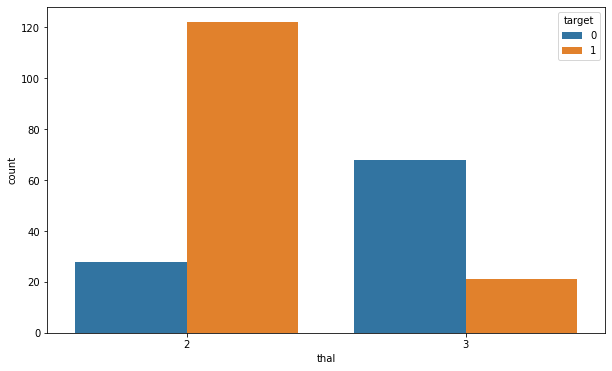

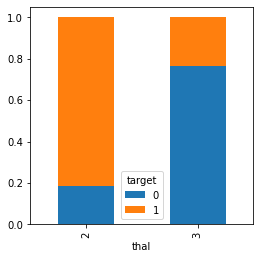

In [45]:
plt.figure(figsize=(10,6))  
sns.countplot(x="thal", hue="target", data=heart)

thal=pd.crosstab(heart["thal"],heart["target"])
thal.div(thal.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

##### We see the chances of heart attack are high in people having fixed defect thalassemia and less in people having reversable defect thalassemia.

# Splitting Data into Dependent and Independent Variable:

In [46]:
x = heart.drop(['target'], axis = 1)
y = heart.target

In [47]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2


In [48]:
y.head()

0    0
1    0
2    0
3    0
5    1
Name: target, dtype: int64

In [49]:
y.value_counts()

1    143
0     96
Name: target, dtype: int64

##### As people having heart disease are more than not having heart disease , the data is imbalanced.So, first we have to balance this data.


# Balancing the data

In [50]:
from collections import Counter 
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_res,y_res=sm.fit_resample(x,y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_res))

original dataset shape: Counter({1: 143, 0: 96})
Resample dataset shape Counter({0: 143, 1: 143})


# Splitting Data into Training and Testing Data

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=45)

In [52]:
x_train.shape,x_test.shape

((200, 13), (86, 13))

In [53]:
y_train.shape,y_test.shape

((200,), (86,))

# Feature Scaling

##### As in the data the variables are of different unit so we have to scale all the variables in the same unit.

In [54]:
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 1.31268422, -1.50953255,  1.14846498, ..., -0.63167162,
         0.62554324, -0.84225988],
       [ 0.62869765,  0.66245673, -0.85758739, ...,  1.07554897,
         0.62554324,  1.187282  ],
       [ 1.65467751,  0.66245673,  2.15149116, ..., -0.63167162,
         0.62554324, -0.84225988],
       ...,
       [ 0.40070213,  0.66245673, -0.85758739, ...,  1.07554897,
         2.01563934,  1.187282  ],
       [ 0.74269542, -1.50953255, -0.85758739, ...,  1.07554897,
        -0.76455285, -0.84225988],
       [-0.28328444,  0.66245673,  0.1454388 , ...,  1.07554897,
        -0.76455285, -0.84225988]])

# Model Building

# 1.Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix,recall_score,precision_score,ConfusionMatrixDisplay

In [56]:
maxi_iter = [ ]
for i in range(0,110,10):
    model_l = LogisticRegression(max_iter=i)
    model_l.fit(x_train,y_train)
    pred_l = model_l.predict(x_test)
    accuracy_score(y_test,pred_l)
    maxi_iter.append(accuracy_score(y_test,pred_l))
    print("max_iter : ",i)
    print("accuracy score : ",(accuracy_score(y_test,pred_l)))
    print("\n")
print("Max_iter : ",(maxi_iter.index(max(maxi_iter)))*10)
print("Accuracy_score : ",max(maxi_iter))

max_iter :  0
accuracy score :  0.8604651162790697


max_iter :  10
accuracy score :  0.9069767441860465


max_iter :  20
accuracy score :  0.9069767441860465


max_iter :  30
accuracy score :  0.9069767441860465


max_iter :  40
accuracy score :  0.9069767441860465


max_iter :  50
accuracy score :  0.9069767441860465


max_iter :  60
accuracy score :  0.9069767441860465


max_iter :  70
accuracy score :  0.9069767441860465


max_iter :  80
accuracy score :  0.9069767441860465


max_iter :  90
accuracy score :  0.9069767441860465


max_iter :  100
accuracy score :  0.9069767441860465


Max_iter :  10
Accuracy_score :  0.9069767441860465


In [57]:
precision_score(y_test,pred_l)

0.9245283018867925

In [58]:
recall_score(y_test,pred_l)

0.9245283018867925

In [59]:
confusion_matrix(y_test,pred_l)

array([[29,  4],
       [ 4, 49]], dtype=int64)

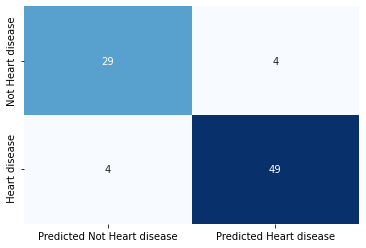

In [60]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_l)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', cbar=False, yticklabels=['Not Heart disease', ' Heart disease'],
            xticklabels=['Predicted Not Heart disease', 'Predicted Heart disease'])
plt.show()

# 2.Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model_dt = DecisionTreeClassifier(max_depth=3)

In [63]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [64]:
pred_dt = model_dt.predict(x_test)
pred_dt

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [65]:
accuracy_score(y_test,pred_dt)

0.813953488372093

In [66]:
precision_score(y_test,pred_dt)

0.8363636363636363

In [67]:
recall_score(y_test,pred_dt)

0.8679245283018868

In [68]:
confusion_matrix(y_test,pred_dt)

array([[24,  9],
       [ 7, 46]], dtype=int64)

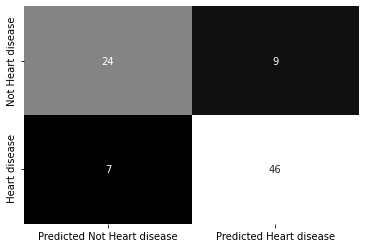

In [69]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm, cmap='Greys_r', annot=True, fmt='d', cbar=False, yticklabels=['Not Heart disease', ' Heart disease'],
            xticklabels=['Predicted Not Heart disease', 'Predicted Heart disease'])
plt.show()

In [70]:
from sklearn.tree import plot_tree

In [71]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [72]:
heart.target.unique()

array([0, 1], dtype=int64)

In [73]:
feature_name = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
cn = ["0","1"]

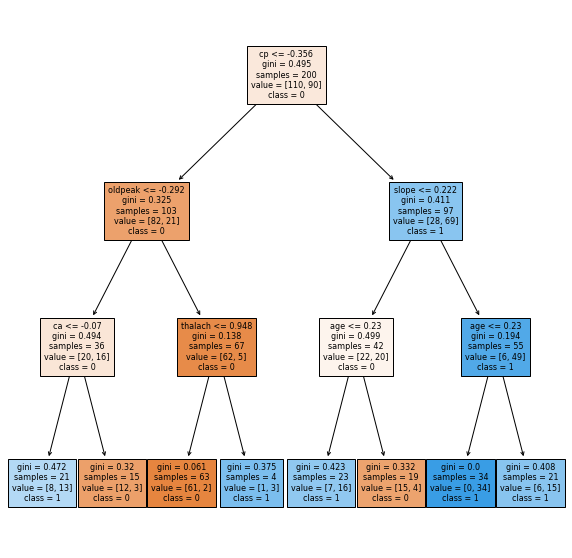

In [74]:
plt.figure(figsize=(10,10))
a = plot_tree(model_dt,fontsize=8,feature_names=feature_name,class_names=cn,filled=True)
plt.show()

# 3.KNN Algorithm

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)

In [77]:
pred_knn

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [78]:
accuracy_score(y_test,pred_knn)

0.8488372093023255

In [79]:
n_neighbor = []
for i in range(5,75,2):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_knn = model_knn.predict(x_test)
    accuracy_score(pred_knn,y_test)
    n_neighbor.append(accuracy_score(pred_knn,y_test))
    print("n_neighbors : ",i)
    print("accuracy score : ",(accuracy_score(pred_knn,y_test)))
    print("\n")
print("Accuracy : ",max(n_neighbor))

n_neighbors :  5
accuracy score :  0.8488372093023255


n_neighbors :  7
accuracy score :  0.8604651162790697


n_neighbors :  9
accuracy score :  0.8488372093023255


n_neighbors :  11
accuracy score :  0.8023255813953488


n_neighbors :  13
accuracy score :  0.813953488372093


n_neighbors :  15
accuracy score :  0.813953488372093


n_neighbors :  17
accuracy score :  0.8023255813953488


n_neighbors :  19
accuracy score :  0.8023255813953488


n_neighbors :  21
accuracy score :  0.8255813953488372


n_neighbors :  23
accuracy score :  0.813953488372093


n_neighbors :  25
accuracy score :  0.8372093023255814


n_neighbors :  27
accuracy score :  0.7906976744186046


n_neighbors :  29
accuracy score :  0.7906976744186046


n_neighbors :  31
accuracy score :  0.7906976744186046


n_neighbors :  33
accuracy score :  0.7906976744186046


n_neighbors :  35
accuracy score :  0.7906976744186046


n_neighbors :  37
accuracy score :  0.8023255813953488


n_neighbors :  39
accuracy score :  0

In [ ]:
n_neighbors :  7
accuracy score :  0.8604651162790697


In [80]:
precision_score(y_test,pred_knn)

0.8653846153846154

In [81]:
recall_score(y_test,pred_knn)

0.8490566037735849

In [82]:
confusion_matrix(y_test,pred_knn)

array([[26,  7],
       [ 8, 45]], dtype=int64)

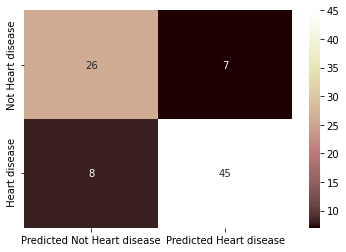

In [83]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_knn)
sns.heatmap(cm, cmap='pink', annot=True, fmt='d', yticklabels=['Not Heart disease', ' Heart disease'],
            xticklabels=['Predicted Not Heart disease', 'Predicted Heart disease'])
plt.show()

In [84]:
scores = []
for k in range(5,75,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred_knn = knn.predict(x_test)
    accuracy_score(pred_knn,y_test)
    scores.append(accuracy_score(pred_knn,y_test))

print(scores)

[0.8488372093023255, 0.8604651162790697, 0.8488372093023255, 0.8023255813953488, 0.813953488372093, 0.813953488372093, 0.8023255813953488, 0.8023255813953488, 0.8255813953488372, 0.813953488372093, 0.8372093023255814, 0.7906976744186046, 0.7906976744186046, 0.7906976744186046, 0.7906976744186046, 0.7906976744186046, 0.8023255813953488, 0.813953488372093, 0.813953488372093, 0.7906976744186046, 0.7906976744186046, 0.813953488372093, 0.813953488372093, 0.7906976744186046, 0.8255813953488372, 0.813953488372093, 0.7790697674418605, 0.7790697674418605, 0.7906976744186046, 0.8023255813953488, 0.8023255813953488, 0.8023255813953488, 0.813953488372093, 0.813953488372093, 0.8255813953488372]


Text(0, 0.5, 'Testing Accuracy')

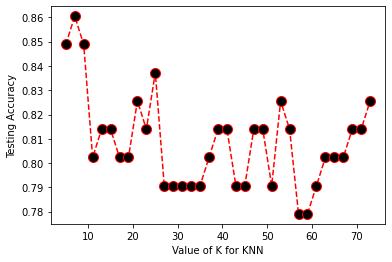

In [85]:
plt.plot(range(5,75,2), scores,color ="red",linestyle = "dashed",marker ="o",markerfacecolor ="black",markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy') 


# 4.Naive Bayes Classifier

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
pred_nb = model_nb.predict(x_test)
pred_nb

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [88]:
accuracy_score(y_test,pred_nb)

0.9069767441860465

In [89]:
precision_score(y_test,pred_nb)

0.9245283018867925

In [90]:
recall_score(y_test,pred_nb)

0.9245283018867925

In [91]:
confusion_matrix(y_test,pred_nb)

array([[29,  4],
       [ 4, 49]], dtype=int64)

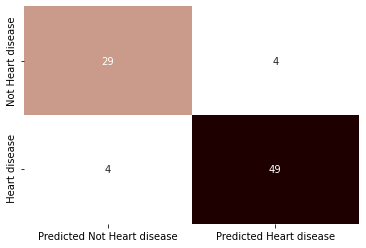

In [92]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_nb)
sns.heatmap(cm, cmap='pink_r', annot=True, fmt='d', cbar=False, yticklabels=['Not Heart disease', ' Heart disease'],
            xticklabels=['Predicted Not Heart disease', 'Predicted Heart disease'])
plt.show()

# 5.Support Vector Machine

In [93]:
from sklearn.svm import SVC

In [94]:
model_svc = SVC()
model_svc.fit(x_train,y_train)
pred_svc = model_svc.predict(x_test)

In [95]:
pred_svc

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [96]:
accuracy_score(y_test,pred_svc)

0.8488372093023255

In [97]:
precision_score(y_test,pred_svc)

0.9166666666666666

In [98]:
recall_score(y_test,pred_svc)

0.8301886792452831

In [99]:
confusion_matrix(y_test,pred_svc)

array([[29,  4],
       [ 9, 44]], dtype=int64)

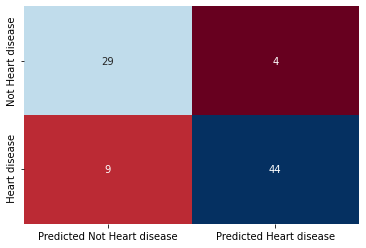

In [100]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm, cmap='RdBu', annot=True, fmt='d', cbar=False, yticklabels=['Not Heart disease', ' Heart disease'],
            xticklabels=['Predicted Not Heart disease', 'Predicted Heart disease'])
plt.show()

# 6.Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
pred_rf = model_rf.predict(x_test)

In [103]:
pred_rf

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [104]:
accuracy_score(y_test,pred_rf)

0.872093023255814

In [105]:
precision_score(y_test,pred_rf)

0.9565217391304348

In [106]:
recall_score(y_test,pred_rf)

0.8301886792452831

In [107]:
confusion_matrix(y_test,pred_rf)

array([[31,  2],
       [ 9, 44]], dtype=int64)

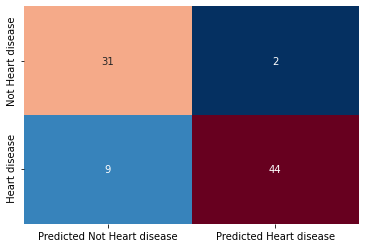

In [108]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm, cmap='RdBu_r', annot=True, fmt='d', cbar=False,yticklabels=['Not Heart disease', ' Heart disease'],
            xticklabels=['Predicted Not Heart disease', 'Predicted Heart disease'])
plt.show()

# 7.Gradient Boosting

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
model_gbc = GradientBoostingClassifier()
model_gbc.fit(x_train,y_train)
pred_gbc = model_gbc.predict(x_test)
pred_gbc

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [111]:
accuracy_score(y_test,pred_gbc)

0.8372093023255814

In [112]:
precision_score(y_test,pred_gbc)

0.9148936170212766

In [113]:
recall_score(y_test,pred_gbc)

0.8113207547169812

In [114]:
confusion_matrix(y_test,pred_gbc)

array([[29,  4],
       [10, 43]], dtype=int64)

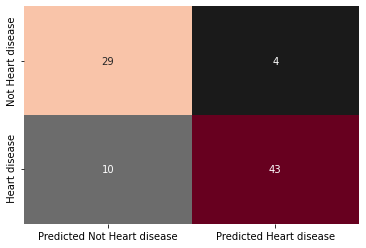

In [115]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_gbc)
sns.heatmap(cm, cmap='RdGy_r', annot=True, fmt='d', cbar=False, yticklabels=['Not Heart disease', ' Heart disease'],
            xticklabels=['Predicted Not Heart disease', 'Predicted Heart disease'])
plt.show()

# Conclusion : 

##### Among all the algorithms Logistic Regression & Naive Bayes performs best with same accuracy_score = 0.9069767441860465 
Precision_score = 0.9245283018867925

Recall_score = 0.9245283018867925

#### so for further prediction we use Logistic Regression Classifier.

In [117]:
#Entering new data to check whether person has heart disease or not

Age = int(input('Input Age = '))
Sex= int(input('Input sex = '))
cp = int(input('Input cp = '))
trestbps = int(input('Input trestbps = '))
chol = int(input('Input chol = '))
fbs= int(input('Input fbs = '))
restecg= int(input('Input restecg = '))
thalach = int(input('Input thalach = '))
exang = int(input('Input exang = '))
oldpeak = float(input('Input oldpeak = '))
slope = int(input('Input slope = '))
ca = int(input('Input ca = '))
thal = int(input('Input thal = '))

Result = [[Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]

predict_data=model_l.predict(Result)
print('Heart Disease of Person', predict_data)

if predict_data==[0]:
    print("\n\n     ...Congratulations...Congratulations...Congratulations...Congratulations...      😊You Don't have Heart Disease")
else:
    print("\n\n     ...Alert...Alert...Alert...Alert...Alert...Alert...Alert...      😔You have Heart Disease,Please Take care.")

Input Age = 52
Input sex = 1
Input cp = 0
Input trestbps = 125
Input chol = 212
Input fbs = 0
Input restecg = 1
Input thalach = 168
Input exang = 0
Input oldpeak = 1.0
Input slope = 2
Input ca = 2
Input thal = 3
Heart Disease of Person [0]


     ...Congratulations...Congratulations...Congratulations...Congratulations...      😊You Don't have Heart Disease


# Thank You!!!